# **Першопочаткове налаштування**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

if tf.config.list_physical_devices('GPU'):
  print("TensorFlow IS using the GPU")
else:
  print("TensorFlow IS NOT using the GPU")

TensorFlow IS NOT using the GPU


Налаштування було успішним, у ході експериментів використовуватиметься GPU.

Перейдемо до реалізації практичного завдання лабораторної роботи, завантаживши класичний датасет для задачі класифікації зображень Fashion MNIST, що складається з зображень розміром 28*28 пікселів у сірому діапазоні кольорів.

Так як цей датасет вбудований в Keras, завантажимо його одразу:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Завантажені зображення є, по суті, масивами пікселів, значення кожного з пікселів варіюється від 0 до 255, включно, а значення кожного з лейблів у масивах лейблів варіюються від 0 до 9 включно, ці значення є фактичними класами, до яких нейромережа приписуватиме зображення.

Так як ми хочемо отримати відносно точні результати у наслідку тренування нейромережі, одразу нормалізуємо формат даних таким чином, аби кожне значення використовуваних нейромережею масивів відповідало діапазону [0; 1].

Зробити це можна, поділивши значення масивів пікселів на 255, адже це є найбільшим значенням у масивах:

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# **Побудова початкової моделі**

Побудуємо архітектуру простої секвентальної нейромережі (Sequential API):

In [4]:
model = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ],
    name='TDP1'
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Дана модель матиме три слої:

1.  Вхідний слой Flatten, за рахунок пре-процесингу якого двомірні матриці пікселів перегортаються в одномірні масиви чисел, з якими зможе працювати нейромережа;
2.  Прихований слой Dense, який є основним обчислювальним слоєм з 128 нейронами, активаційна функція relu використовується через свою поширеність у простих задачах класифікації зображень;
3.  Вихідний слой Dense, має 10 нейронів для кожного з класів зображень ([0; 9]), активаційна функція softmax використовується для автоматичної конвертації вихідних даних у відсоткові значення для кожного з 10 класів.



# **Компіляція початкової моделі**

Проведемо компіляцію моделі та виведемо її архітектуру:

In [5]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

У кожної мережі є три основні компіляційні параметри: функція оптимізації (optimizer), функція втрати (loss) і параметр виведення (metrics). Розглянемо вибір кожного з них:



*   Optimizer: було обрано Adam, адже ця функція є найбільш поширеною для задач класифікації;
*   Loss: було обрано Sparse Categorical Crossentropy, адже ця функція є найбільш поширеною для задач класифікації;
*   Metrics: було обрано accuracy, адже по ходу тестування ми бажаємо бачити саме точність моделі нейромережі.



Виведемо підсумки зкомпільованої моделі нейромережі:

In [6]:
model.summary()

Model: "TDP1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Як можемо побачити, у створеній моделі:


1.   На першому слої: 784 (28*28) вхідних параметри, і 0 вихідних, адже слой є виключно вхідним;
2.   На другому слої: 128 вхідних параметрів (за кількістю нейронів), і 100480 (784 * 128 + 128 зміщень за замовчуванням) вихідних параметрів;
3. На третьому слої: 10 вхідних параметрів (за кількістю нейронів), і 1290 (128 * 10 + 10 зміщень за замовчуванням) вихідних параметрів;



# **Тренування початкової моделі**

Виконаємо першопочаткове тренування моделі з 10 епохами, і виділенням 20% тренувальних даних (12000 з 60000) на валідацію, аби розміри даних для валідації (12000) та тестування (10000) були приблизно однаковими:

In [7]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7638 - loss: 0.6728 - val_accuracy: 0.8561 - val_loss: 0.4132
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8531 - loss: 0.4104 - val_accuracy: 0.8508 - val_loss: 0.4087
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8732 - loss: 0.3531 - val_accuracy: 0.8723 - val_loss: 0.3571
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8799 - loss: 0.3230 - val_accuracy: 0.8702 - val_loss: 0.3547
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8883 - loss: 0.3040 - val_accuracy: 0.8817 - val_loss: 0.3304
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8925 - loss: 0.2874 - val_accuracy: 0.8768 - val_loss: 0.3422
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8994 - loss: 0.2701 - val_accuracy: 0.8834 - val_loss: 0.3252
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9012 - loss: 0.2668 - val_accur

Тепер, виконаємо аналіз точності моделі на тестових даних:

In [8]:
print("--- Перевіряємо точність моделі на тестових даних ---")
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("Тестова точність:", test_accuracy)
print("Тестова помилка:", test_loss)

--- Перевіряємо точність моделі на тестових даних ---
313/313 - 1s - 4ms/step - accuracy: 0.8769 - loss: 0.3494
Тестова точність: 0.8769000172615051
Тестова помилка: 0.34939542412757874


Виведемо на графіку результати тестувань, що покажуть ефективність моделі:

In [9]:
def display_results(history, model=None, title=None):
  name = (
        title
        or (getattr(model, 'name', None))
        or (getattr(getattr(history, 'model', None), 'name', None))
        or 'Модель'
      )

  history_dictionary = history.history
  accuracy = history_dictionary['accuracy']
  val_accuracy = history_dictionary['val_accuracy']
  loss = history_dictionary['loss']
  val_loss = history_dictionary['val_loss']
  epochs_range = range(1, len(accuracy) + 1)

  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  fig.suptitle(f'Модель: {name}', fontsize=14, y=1.03)

  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, accuracy, 'o-', color='#1f77b4', label='Точність тренування')
  plt.plot(epochs_range, val_accuracy, '-', color='#ff7f0e', label='Точність валідації')
  plt.title('Точність тренування і валідації')
  plt.xlabel('Епохи')
  plt.ylabel('Точність')
  plt.ylim(0.5, 1.0)
  plt.legend()
  plt.grid(alpha=0.2)

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, 'o-', color='#1f77b4', label='Помилка тренування')
  plt.plot(epochs_range, val_loss, '-', color='#ff7f0e', label='Помилка валідації')
  plt.title('Помилка тренування і валідації')
  plt.xlabel('Епохи')
  plt.ylabel('Помилка')
  plt.ylim(0.0, 0.5)
  plt.legend()
  plt.grid(alpha=0.2)

  fig.tight_layout(rect=[0, 0, 1, 0.95])
  plt.show()


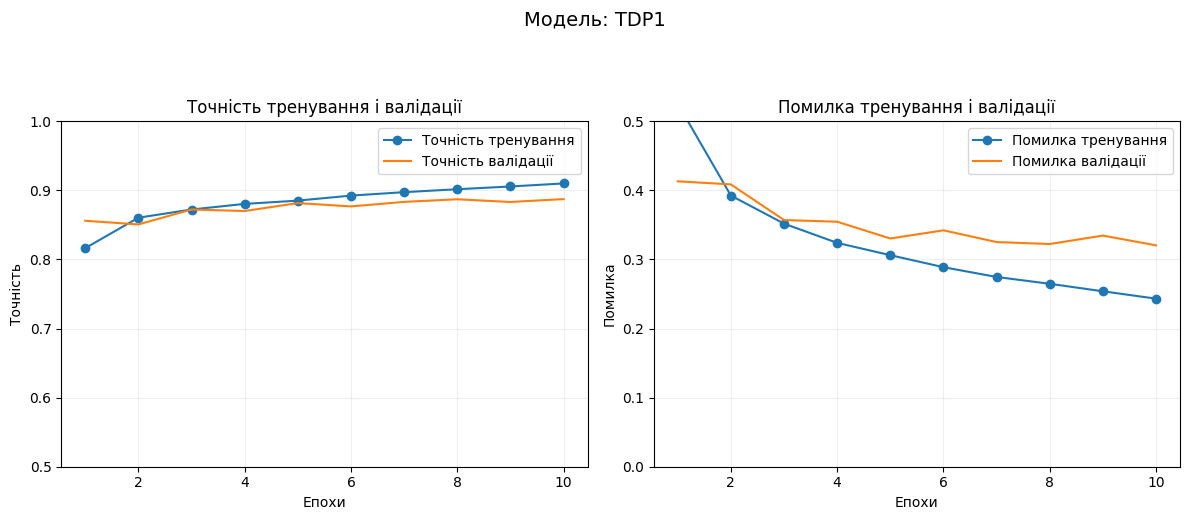

In [10]:
display_results(history)

Як можемо побачити, приблизно після 4 епох зменшується точність валідації даних, непропорційно тренувальним даним.

Спробуємо різні оптимізації, аби побачити їхній ефект на точності моделі, але спочатку збережемо першопочаткову модель:

In [11]:
model.save('tdp1_model_v1.keras')
print('\nЗбережено модель tdp1_model_v1')


Збережено модель tdp1_model_v1


# **Оптимізація місткості моделі**

Спочатку, аби запобігти перенавчання у будь-якому майбутньому сценаріЇ, застосуємо метод ранньої зупинки зі значенням толерантності 10:

In [12]:
early_stopping_callback = keras.callbacks.EarlyStopping(
    monitor='val_xent',
    patience=10,
    min_delta=1e-3,
    restore_best_weights=True,
    mode='min'
)

Застосуємо також поступове зниження швидкості навчання:

In [13]:
lr_reduction_callback = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,
    cooldown=2,
    min_delta=1e-3,
    min_lr=1e-6,
    verbose=1,
    mode='min'
)

Протестуємо раніше створену модель з новими гіперпараметрами, але спочатку визначимо загальні методи:

In [14]:
def get_optimizer(lr=1e-3):
  return keras.optimizers.Adam(learning_rate=lr)

def compile_and_fit(model, name=None, optimizer=None, max_epochs=10000):
  if optimizer is None:
    optimizer = get_optimizer()

  model.compile(
    optimizer=optimizer,
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=[
        'accuracy',
        keras.losses.SparseCategoricalCrossentropy(name='xent')
            ]
    )

  model.summary()

  history = model.fit(
      train_images,
      train_labels,
      epochs=max_epochs,
      validation_split=0.2,
      callbacks=[early_stopping_callback, lr_reduction_callback],
      verbose=1
      )
  return history

Застосуємо новостворені оптимізації на раніше збереженій моделі та виведемо результати:

Model: "TDP1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9103 - loss: 0.2334 - xent: 0.2334 - val_accuracy: 0.8878 - val_loss: 0.3289 - val_xent: 0.3289 - learning_rate: 0.0010
Epoch 2/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9171 - loss: 0.2214 - xent: 0.2214 - val_accuracy: 0.8848 - val_loss: 0.3369 - val_xent: 0.3369 - learning_rate: 0.0010
Epoch 3/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9186 - loss: 0.2188 - xent: 0.2188 - val_accuracy: 0.8906 - val_loss: 0.3220 - val_xent: 0.3220 - learning_rate: 0.0010
Epoch 4/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9222 - loss: 0.2080 - xent: 0.2080 - val_accuracy: 0.8894 - val_loss: 0.3147 - val_xent: 0.3147 - learning_rate: 0.0010
Epoch 5/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9240 - loss: 0.1972 - xent: 0.1972 - val_accuracy: 0.8884 - val_loss: 0.3298 - val_xent: 0.3298 - learning_rate: 0.0010
Epoch 6/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━

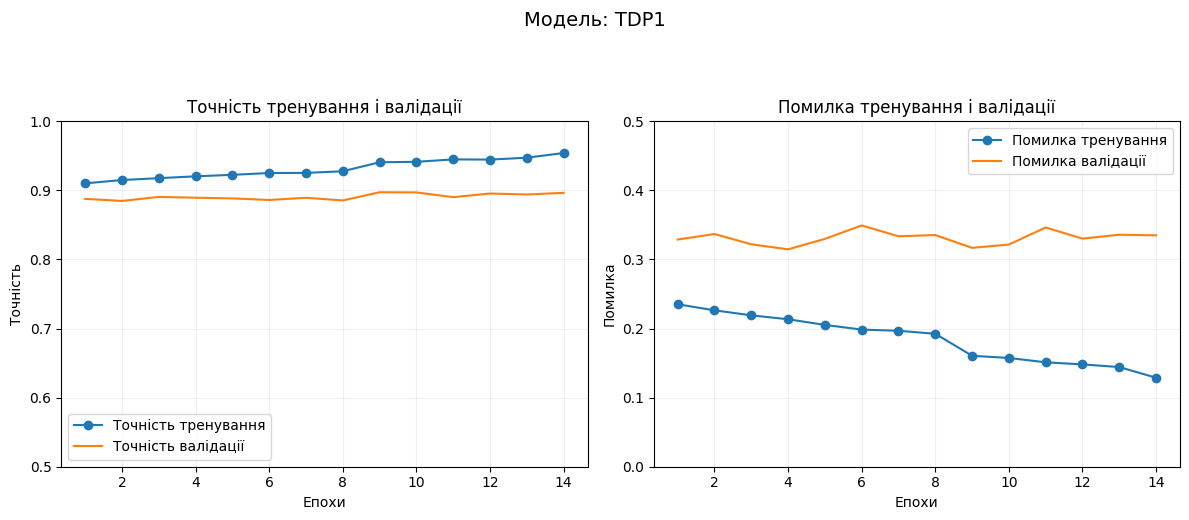

In [15]:
initial_model = keras.models.load_model('tdp1_model_v1.keras')

history = compile_and_fit(initial_model)
display_results(history)

Як можемо побачити, хоча запровадження зменшення швидкості навчання збільшило кількість епох з 10 до приблизно 25, результативні точність та помилка на тестових та валідаційних даних кращі.

Спробуємо тепер різні за розміром архітектури (кількість шарів та нейронів) з новоствореними пасивними оптимізаціями, аби визначити найбільш оптимальний розмір моделі. Визначимо початкові архітектури:

In [16]:
model_tiny = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ],
    name='TDP1_tiny'
)

model_small = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ],
    name='TDP1_small'
)

model_medium = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ],
    name='TDP1_medium'
)

model_large = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ],
    name='TDP1_large'
)

Проведемо компіляцію та тренування цих моделей:

In [17]:
size_histories = {}
size_histories['initial'] = history
size_histories['tiny'] = compile_and_fit(model_tiny)
size_histories['small'] = compile_and_fit(model_small)
size_histories['medium'] = compile_and_fit(model_medium)
size_histories['large'] = compile_and_fit(model_large)

Model: "TDP1_tiny"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7292 - loss: 0.7789 - xent: 0.7789 - val_accuracy: 0.8415 - val_loss: 0.4587 - val_xent: 0.4587 - learning_rate: 0.0010
Epoch 2/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8502 - loss: 0.4346 - xent: 0.4346 - val_accuracy: 0.8564 - val_loss: 0.4110 - val_xent: 0.4110 - learning_rate: 0.0010
Epoch 3/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8615 - loss: 0.3960 - xent: 0.3960 - val_accuracy: 0.8602 - val_loss: 0.3974 - val_xent: 0.3974 - learning_rate: 0.0010
Epoch 4/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8709 - loss: 0.3699 - xent: 0.3699 - val_accuracy: 0.8662 - val_loss: 0.3897 - val_xent: 0.3897 - learning_rate: 0.0010
Epoch 5/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8765 - loss: 0.3488 - xent: 0.3488 - val_accuracy: 0.8698 - val_loss: 0.3725 - val_xent: 0.3725 - learning_rate: 0.0010
Epoch 6/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 

Model: "TDP1_small"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7623 - loss: 0.6971 - xent: 0.6971 - val_accuracy: 0.8472 - val_loss: 0.4400 - val_xent: 0.4400 - learning_rate: 0.0010
Epoch 2/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8536 - loss: 0.4171 - xent: 0.4171 - val_accuracy: 0.8643 - val_loss: 0.3843 - val_xent: 0.3843 - learning_rate: 0.0010
Epoch 3/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8631 - loss: 0.3773 - xent: 0.3773 - val_accuracy: 0.8707 - val_loss: 0.3666 - val_xent: 0.3666 - learning_rate: 0.0010
Epoch 4/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8735 - loss: 0.3472 - xent: 0.3472 - val_accuracy: 0.8675 - val_loss: 0.3674 - val_xent: 0.3674 - learning_rate: 0.0010
Epoch 5/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8802 - loss: 0.3265 - xent: 0.3265 - val_accuracy: 0.8768 - val_loss: 0.3480 - val_xent: 0.3480 - learning_rate: 0.0010
Epoch 6/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 

Model: "TDP1_medium"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7683 - loss: 0.6594 - xent: 0.6594 - val_accuracy: 0.8586 - val_loss: 0.3940 - val_xent: 0.3940 - learning_rate: 0.0010
Epoch 2/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8598 - loss: 0.3799 - xent: 0.3799 - val_accuracy: 0.8535 - val_loss: 0.4059 - val_xent: 0.4059 - learning_rate: 0.0010
Epoch 3/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8711 - loss: 0.3476 - xent: 0.3476 - val_accuracy: 0.8703 - val_loss: 0.3594 - val_xent: 0.3594 - learning_rate: 0.0010
Epoch 4/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8795 - loss: 0.3171 - xent: 0.3171 - val_accuracy: 0.8618 - val_loss: 0.3719 - val_xent: 0.3719 - learning_rate: 0.0010
Epoch 5/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8882 - loss: 0.3001 - xent: 0.3001 - val_accuracy: 0.8748 - val_loss: 0.3582 - val_xent: 0.3582 - learning_rate: 0.0010
Epoch 6/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 

Model: "TDP1_large"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7752 - loss: 0.6442 - xent: 0.6442 - val_accuracy: 0.8460 - val_loss: 0.4177 - val_xent: 0.4177 - learning_rate: 0.0010
Epoch 2/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8586 - loss: 0.3823 - xent: 0.3823 - val_accuracy: 0.8633 - val_loss: 0.3756 - val_xent: 0.3756 - learning_rate: 0.0010
Epoch 3/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8724 - loss: 0.3432 - xent: 0.3432 - val_accuracy: 0.8732 - val_loss: 0.3556 - val_xent: 0.3556 - learning_rate: 0.0010
Epoch 4/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8877 - loss: 0.3088 - xent: 0.3088 - val_accuracy: 0.8763 - val_loss: 0.3513 - val_xent: 0.3513 - learning_rate: 0.0010
Epoch 5/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8926 - loss: 0.2907 - xent: 0.2907 - val_accuracy: 0.8802 - val_loss: 0.3333 - val_xent: 0.3333 - learning_rate: 0.0010
Epoch 6/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━

Виведемо результати на 4 графіки для кожної з моделей:

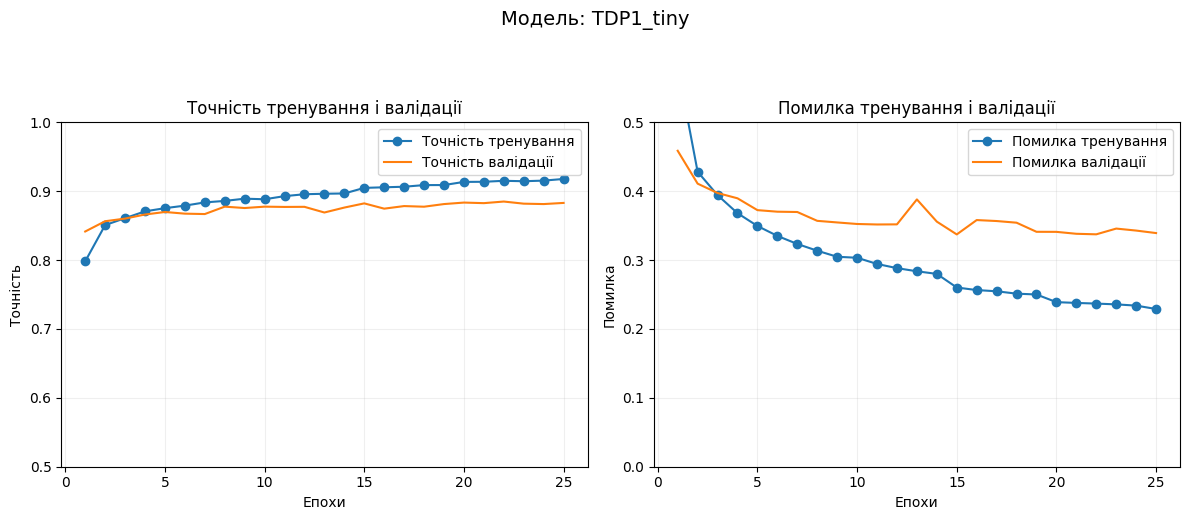

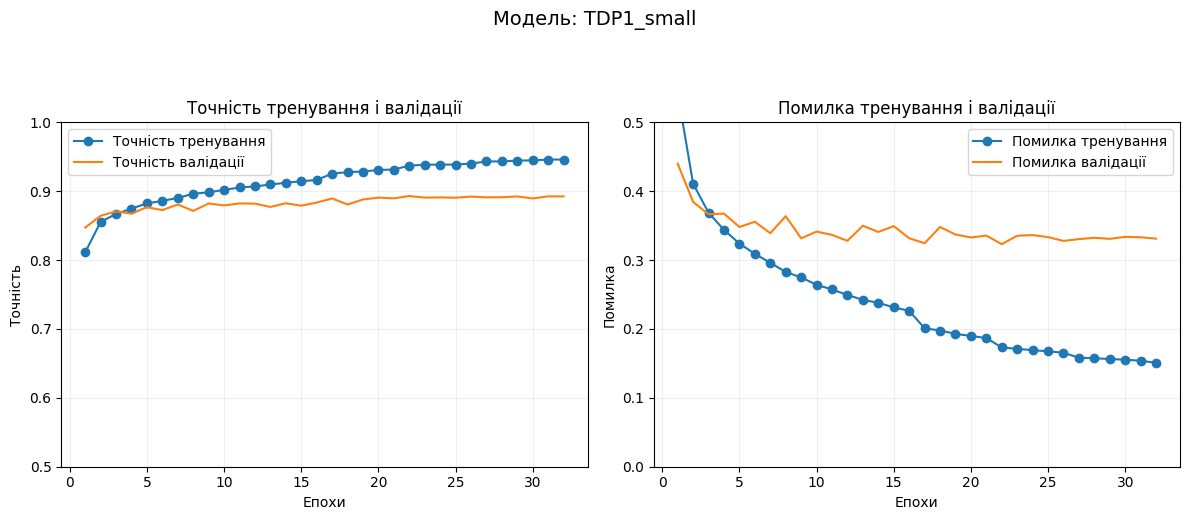

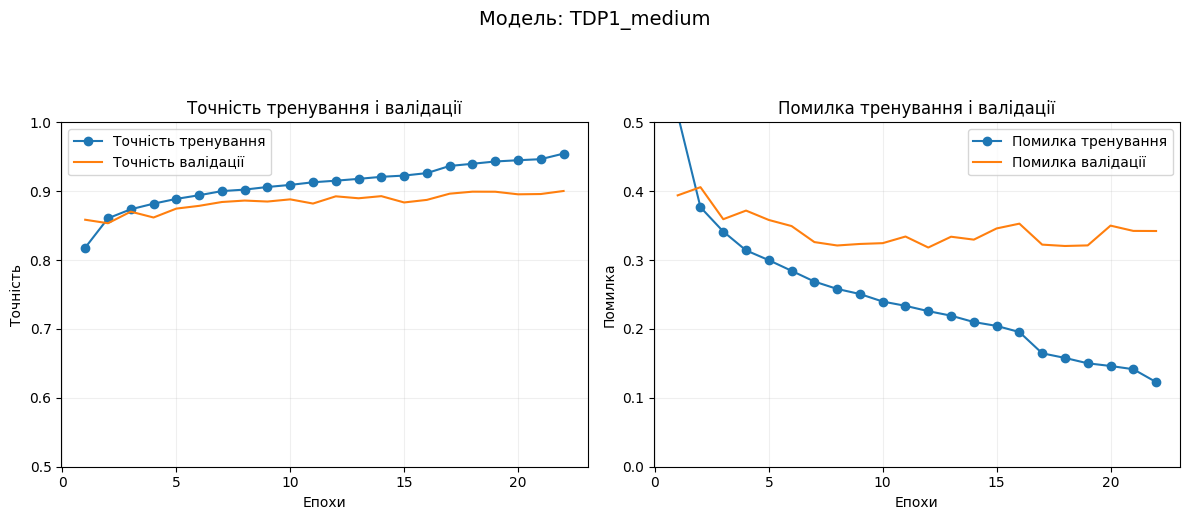

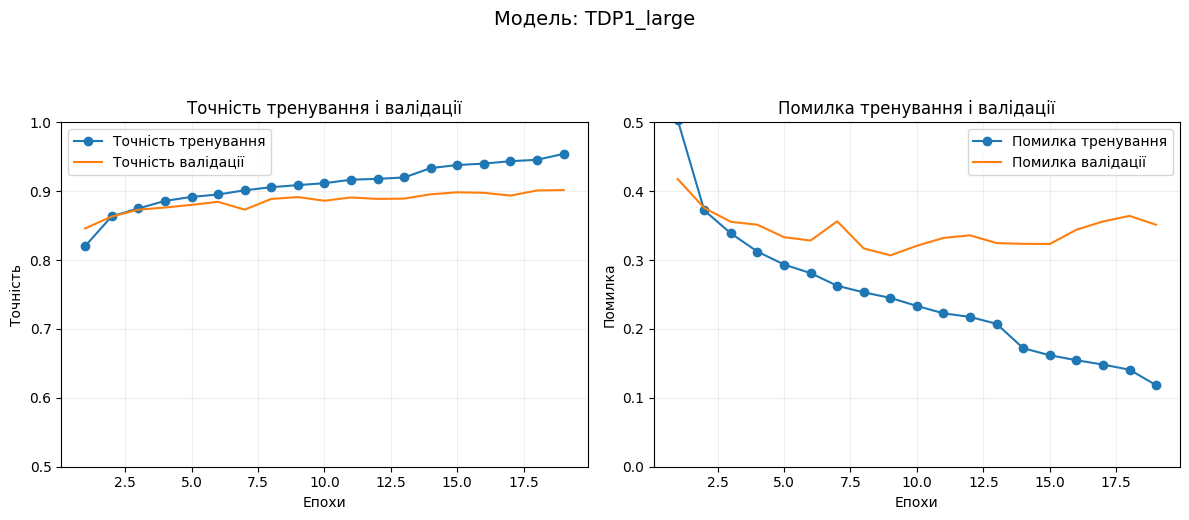

In [18]:
display_results(size_histories['tiny'])
display_results(size_histories['small'])
display_results(size_histories['medium'])
display_results(size_histories['large'])

Додатково, порівняємо на графіку результати помилки валідації всіх моделей, аби визначити найбільш підходящу для подальшої оптимізації архітектуру:

In [19]:
def display_all_results(histories, value, miny=0.25, maxy=0.45, title='Порівняння', ylabel=None, epochs=30):
  plt.figure(figsize=(10, 6))
  for name, history in histories.items():
    plt.plot(history.history[value], label=name)

  plt.xlabel("Епохи")
  plt.ylabel(ylabel)
  plt.title(title)
  plt.legend()
  plt.grid(alpha=0.2)
  plt.xlim([0, epochs])
  plt.ylim([miny, maxy])
  plt.show()

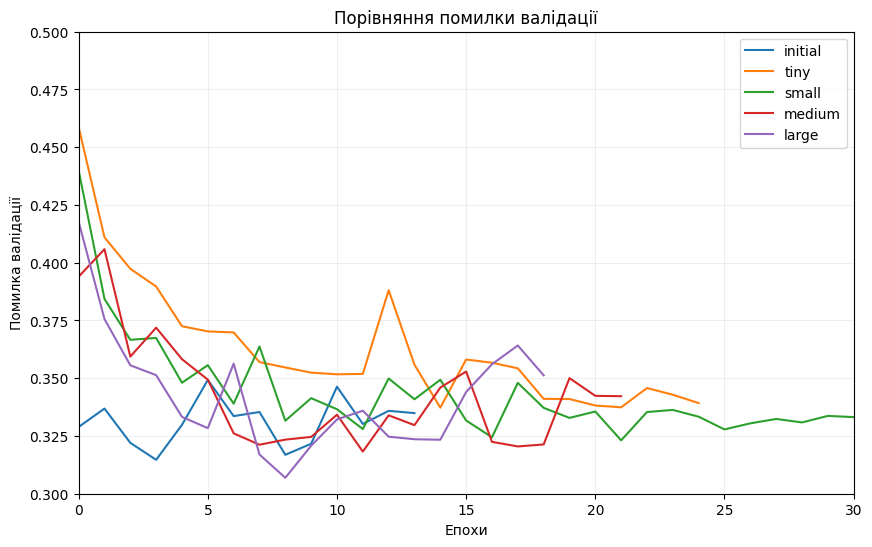

In [20]:
display_all_results(size_histories, 'val_loss', miny=0.3, maxy=0.5, title='Порівняння помилки валідації', ylabel='Помилка валідації')

Як можемо побачити, першопочаткова модель є занадто нестабільною через один прихований слой. Розглянемо інші моделі:


*   Крихітна модель - відбувається недонавчання, висока помилка на всіх епохах;
*   Мала модель - хороша помилка, однак ближче до 10 епох починаться перенавчання;
*   Середня модель - найнижча помилка протягом декількох епох, найбільш незначне перенавчання;
*   Велика модель - очевидне перенавчання;

Роблячи висновок із зображених на графіку результатів, найбільш підходящою моделлю для подальшого використання та оптимізації є середня модель. Мала модель є другим найкращим претендентом, і може буде використаною у ситуаціях де більш швидка модель є приорітетом точній моделі, але середня модель, в даному випадку, буде найбільш збалансованою, тож використаємо її.





Збережемо середню модель для подальших експериментів:

In [21]:
model_medium.save('tdp1_model_v2.keras')
print('\nЗбережено модель tdp1_model_v2')


Збережено модель tdp1_model_v2


# **Ліквідація перенавчання моделі**

Спробуємо застосувати подальші оптимізації, такі як L1/L2 регуляризації та Dropout, аби забезпечити ліквідацію перенавчання і подальше збільшення точності результатів.

Створимо дві моделі, що базуються на щойно збереженій середній моделі, кожна з яких застосуватиме різні види регуляризації: L1, L2 та L1 + L2:

In [22]:
model_medium_l1 = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l1(1e-5)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l1(1e-5)),
    keras.layers.Dense(10, activation='softmax')
    ],
    name='TDP1_medium_l1'
)

model_medium_l2 = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(1e-4)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(1e-4)),
    keras.layers.Dense(10, activation='softmax')
    ],
    name='TDP1_medium_l2'
)

model_medium_l1l2 = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    keras.layers.Dense(10, activation='softmax')
    ],
    name='TDP1_medium_l1l2'
)

Виконаємо компіляцію та тестування нових моделей для порівняння результатів з оригіналом:

In [23]:
initial_model = keras.models.load_model('tdp1_model_v2.keras')

optimization_histories = {}
optimization_histories['initial'] = size_histories['medium']
optimization_histories['l1'] = compile_and_fit(model_medium_l1)
optimization_histories['l2'] = compile_and_fit(model_medium_l2)
optimization_histories['l1l2'] = compile_and_fit(model_medium_l1l2)

Model: "TDP1_medium_l1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7675 - loss: 0.7097 - xent: 0.6654 - val_accuracy: 0.8414 - val_loss: 0.4876 - val_xent: 0.4442 - learning_rate: 0.0010
Epoch 2/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8603 - loss: 0.4299 - xent: 0.3862 - val_accuracy: 0.8610 - val_loss: 0.4300 - val_xent: 0.3852 - learning_rate: 0.0010
Epoch 3/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8735 - loss: 0.3939 - xent: 0.3487 - val_accuracy: 0.8675 - val_loss: 0.4125 - val_xent: 0.3659 - learning_rate: 0.0010
Epoch 4/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8841 - loss: 0.3666 - xent: 0.3196 - val_accuracy: 0.8822 - val_loss: 0.3813 - val_xent: 0.3329 - learning_rate: 0.0010
Epoch 5/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8875 - loss: 0.3545 - xent: 0.3059 - val_accuracy: 0.8740 - val_loss: 0.3991 - val_xent: 0.3495 - learning_rate: 0.0010
Epoch 6/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━

Model: "TDP1_medium_l2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7693 - loss: 0.6922 - xent: 0.6621 - val_accuracy: 0.8503 - val_loss: 0.4578 - val_xent: 0.4251 - learning_rate: 0.0010
Epoch 2/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8577 - loss: 0.4288 - xent: 0.3950 - val_accuracy: 0.8658 - val_loss: 0.4097 - val_xent: 0.3729 - learning_rate: 0.0010
Epoch 3/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8735 - loss: 0.3836 - xent: 0.3461 - val_accuracy: 0.8733 - val_loss: 0.3934 - val_xent: 0.3536 - learning_rate: 0.0010
Epoch 4/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8809 - loss: 0.3619 - xent: 0.3214 - val_accuracy: 0.8713 - val_loss: 0.4035 - val_xent: 0.3608 - learning_rate: 0.0010
Epoch 5/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8832 - loss: 0.3577 - xent: 0.3144 - val_accuracy: 0.8748 - val_loss: 0.3930 - val_xent: 0.3480 - learning_rate: 0.0010
Epoch 6/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━

Model: "TDP1_medium_l1l2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7611 - loss: 0.7526 - xent: 0.6814 - val_accuracy: 0.8466 - val_loss: 0.4785 - val_xent: 0.4117 - learning_rate: 0.0010
Epoch 2/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8535 - loss: 0.4622 - xent: 0.3955 - val_accuracy: 0.8555 - val_loss: 0.4741 - val_xent: 0.4068 - learning_rate: 0.0010
Epoch 3/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8654 - loss: 0.4266 - xent: 0.3586 - val_accuracy: 0.8698 - val_loss: 0.4263 - val_xent: 0.3571 - learning_rate: 0.0010
Epoch 4/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8763 - loss: 0.4081 - xent: 0.3386 - val_accuracy: 0.8692 - val_loss: 0.4371 - val_xent: 0.3667 - learning_rate: 0.0010
Epoch 5/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8814 - loss: 0.3886 - xent: 0.3179 - val_accuracy: 0.8624 - val_loss: 0.4460 - val_xent: 0.3753 - learning_rate: 0.0010
Epoch 6/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 

Виведемо на 3 графіках результати для кожної з нових моделей:

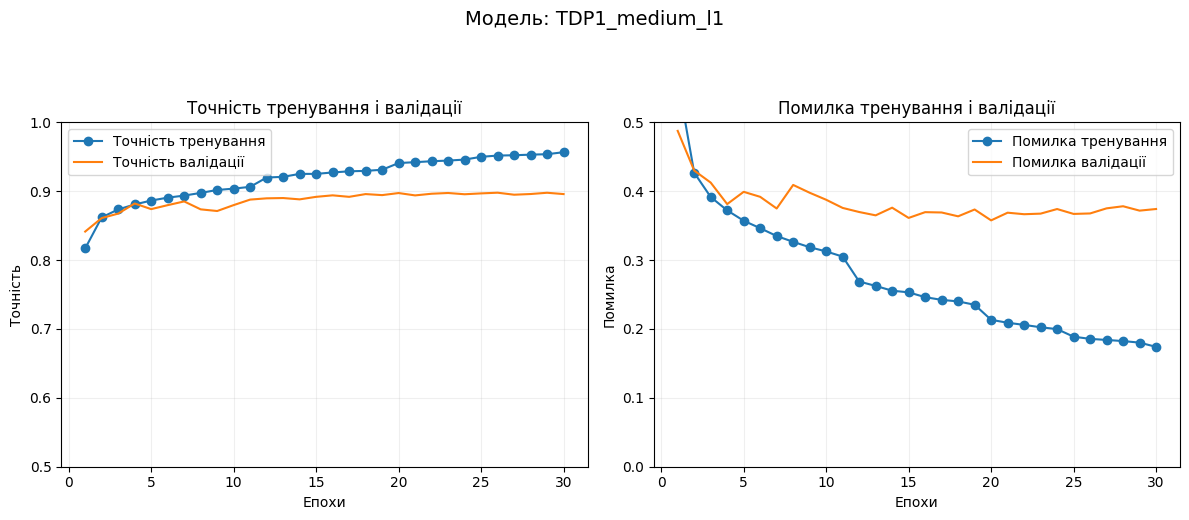

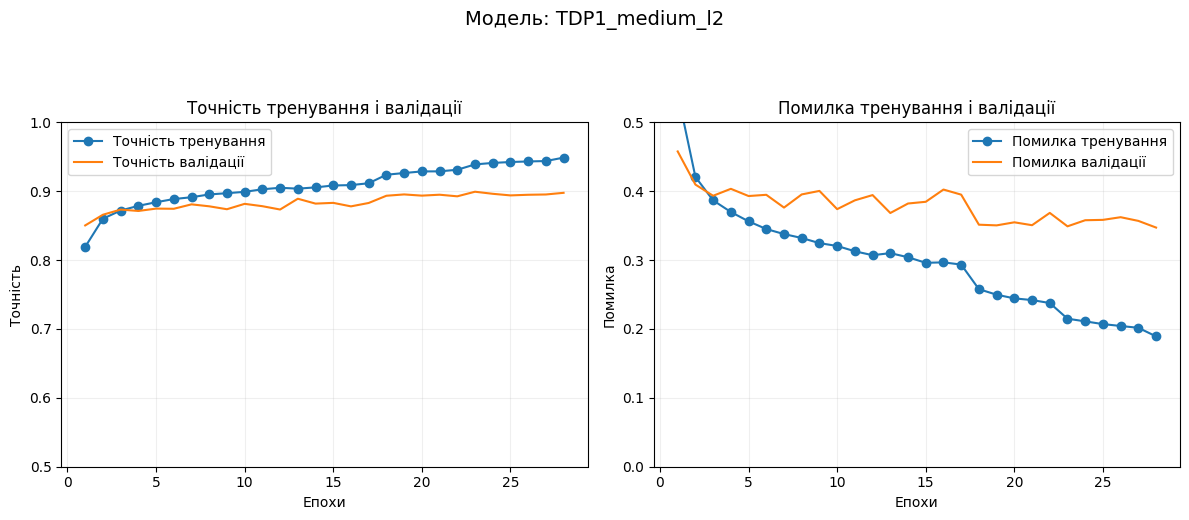

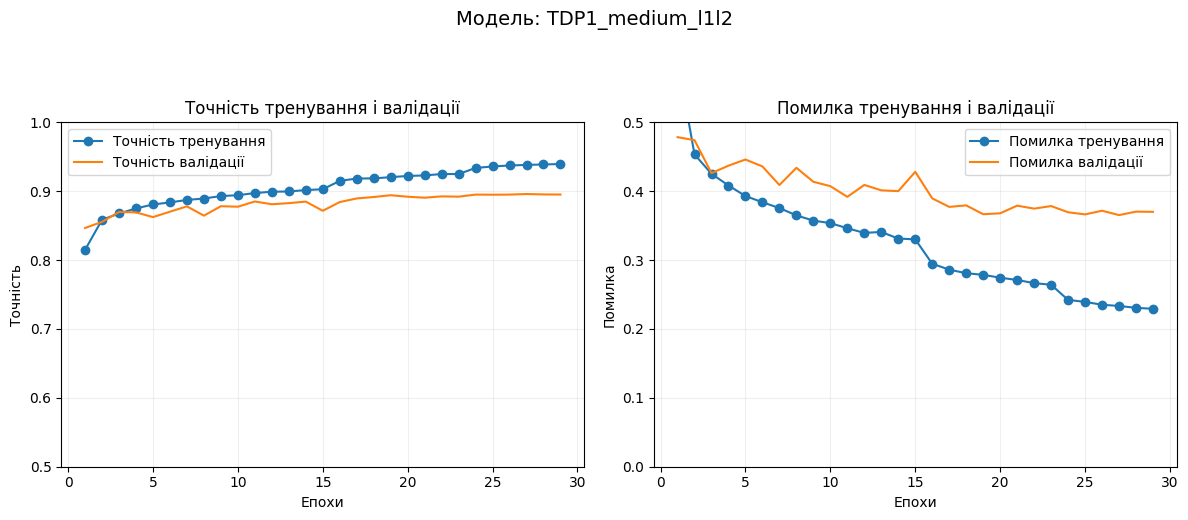

In [24]:
display_results(optimization_histories['l1'])
display_results(optimization_histories['l2'])
display_results(optimization_histories['l1l2'])

Виведемо результати фактичної помилки валідаційних даних всіх моделей для порівняння і визначення ефективності оптимізаційних методів, з урахуванням регуляризаційних штрафів:

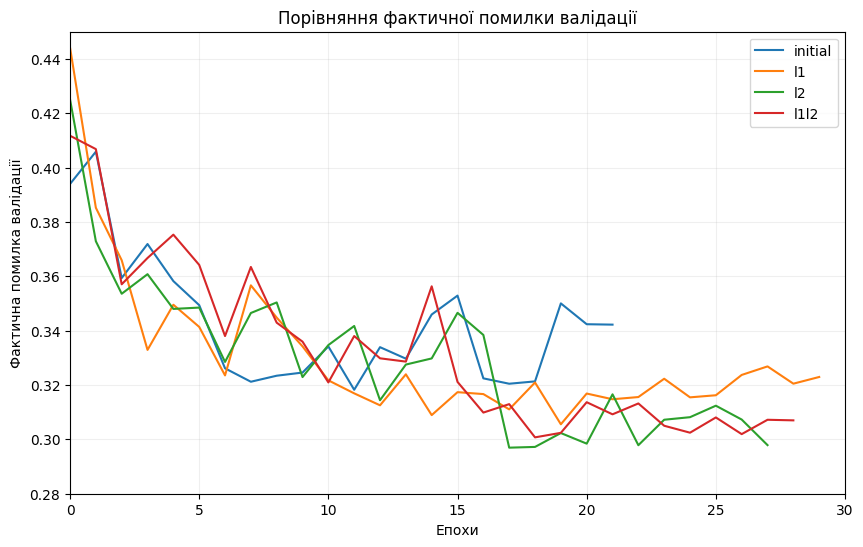

In [25]:
display_all_results(optimization_histories, 'val_xent', miny=0.28, title='Порівняння фактичної помилки валідації', ylabel='Фактична помилка валідації')

Для додаткової наглядності та остаточного рішення, виведемо точність валідаційних даних всіх моделей:

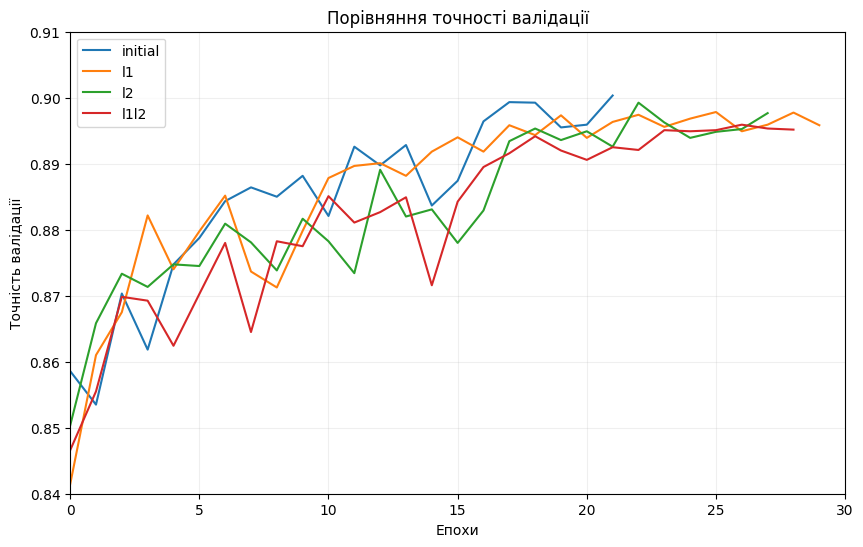

In [26]:
display_all_results(optimization_histories, 'val_accuracy', miny=0.84, maxy=0.91, title='Порівняння точності валідації', ylabel='Точність валідації')

Як результат тестувань, встановимо 0.00001, як значення параметрeа L1 та 0.0001, як значення параметра L2, вони є найбільш ідеальними для конкретно цієї тестової вибірки.

У висновку, можемо побачити, що:


*   Без регуляризації: нестабільна точність та перенавчання даними;
*   Регуляризація L1: ліквідація перенавчання, однак гірші результати за відсутність регуляризації та гірша стабільність;
*   Регуляризація L2: ліквідація перенавчання, задовільні результати та задовільна стабільність;
*   Регуляризація L1 + L2: ліквідація перенавчання, кращі результати за відсутність регуляризації та найкраща стабільність.

Як результат, оберемо регуляризацію L1 + L2 і продовжимо оптимізацію.





Збережемо найкращу модель як основну:

In [27]:
model_medium_l1l2.save('tdp1_model_v3.keras')
print('\nЗбережено модель tdp1_model_v3')


Збережено модель tdp1_model_v3


Додамо Dropout як фінальний метод оптимізації. Створимо три нові моделі, аби знайти найбільш оптимальне значення Dropout - моделі міститимуть слої Dropout зі значеннями 0.2, 0.35 і 0.5, відповідно:

In [28]:
model_medium_l1l2_dropout02 = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    keras.layers.Dropout(0.20),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    keras.layers.Dropout(0.20),
    keras.layers.Dense(10, activation='softmax')
    ],
    name='TDP1_medium_l1l2_dropout0.2'
)

model_medium_l1l2_dropout035 = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    keras.layers.Dropout(0.35),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    keras.layers.Dropout(0.35),
    keras.layers.Dense(10, activation='softmax')
    ],
    name='TDP1_medium_l1l2_dropout0.35'
)

model_medium_l1l2_dropout05 = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
    ],
    name='TDP1_medium_l1l2_dropout0.5'
)

Виконаємо компіляцію та тестування нових моделей для визначення найкращого значення Dropout:

In [29]:
initial_model = keras.models.load_model('tdp1_model_v3.keras')

dropout_histories = {}
dropout_histories['initial'] = optimization_histories['l1l2']
dropout_histories['d0.2'] = compile_and_fit(model_medium_l1l2_dropout02)
dropout_histories['d0.35'] = compile_and_fit(model_medium_l1l2_dropout035)
dropout_histories['d0.5'] = compile_and_fit(model_medium_l1l2_dropout05)

Model: "TDP1_medium_l1l2_dropout0.2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7099 - loss: 0.8896 - xent: 0.8184 - val_accuracy: 0.8360 - val_loss: 0.5073 - val_xent: 0.4390 - learning_rate: 0.0010
Epoch 2/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8322 - loss: 0.5340 - xent: 0.4651 - val_accuracy: 0.8618 - val_loss: 0.4539 - val_xent: 0.3833 - learning_rate: 0.0010
Epoch 3/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8497 - loss: 0.4852 - xent: 0.4137 - val_accuracy: 0.8619 - val_loss: 0.4565 - val_xent: 0.3830 - learning_rate: 0.0010
Epoch 4/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8561 - loss: 0.4735 - xent: 0.3999 - val_accuracy: 0.8661 - val_loss: 0.4368 - val_xent: 0.3618 - learning_rate: 0.0010
Epoch 5/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8606 - loss: 0.4576 - xent: 0.3824 - val_accuracy: 0.8632 - val_loss: 0.4450 - val_xent: 0.3678 - learning_rate: 0.0010
Epoch 6/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 

Model: "TDP1_medium_l1l2_dropout0.35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6625 - loss: 1.0295 - xent: 0.9591 - val_accuracy: 0.8404 - val_loss: 0.5082 - val_xent: 0.4389 - learning_rate: 0.0010
Epoch 2/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8137 - loss: 0.5905 - xent: 0.5201 - val_accuracy: 0.8497 - val_loss: 0.4900 - val_xent: 0.4170 - learning_rate: 0.0010
Epoch 3/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8286 - loss: 0.5467 - xent: 0.4727 - val_accuracy: 0.8577 - val_loss: 0.4595 - val_xent: 0.3830 - learning_rate: 0.0010
Epoch 4/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8412 - loss: 0.5249 - xent: 0.4476 - val_accuracy: 0.8652 - val_loss: 0.4573 - val_xent: 0.3777 - learning_rate: 0.0010
Epoch 5/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8506 - loss: 0.5029 - xent: 0.4231 - val_accuracy: 0.8686 - val_loss: 0.4478 - val_xent: 0.3665 - learning_rate: 0.0010
Epoch 6/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 

Model: "TDP1_medium_l1l2_dropout0.5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5890 - loss: 1.2075 - xent: 1.1384 - val_accuracy: 0.8140 - val_loss: 0.5656 - val_xent: 0.4976 - learning_rate: 0.0010
Epoch 2/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7836 - loss: 0.6837 - xent: 0.6151 - val_accuracy: 0.8363 - val_loss: 0.5139 - val_xent: 0.4424 - learning_rate: 0.0010
Epoch 3/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8005 - loss: 0.6353 - xent: 0.5627 - val_accuracy: 0.8419 - val_loss: 0.5213 - val_xent: 0.4453 - learning_rate: 0.0010
Epoch 4/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8084 - loss: 0.6157 - xent: 0.5386 - val_accuracy: 0.8451 - val_loss: 0.5065 - val_xent: 0.4273 - learning_rate: 0.0010
Epoch 5/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8222 - loss: 0.5938 - xent: 0.5141 - val_accuracy: 0.8543 - val_loss: 0.4851 - val_xent: 0.4035 - learning_rate: 0.0010
Epoch 6/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━

Виведемо на 3 різні графіки результати тестувань та валідації кожної з нових моделей:

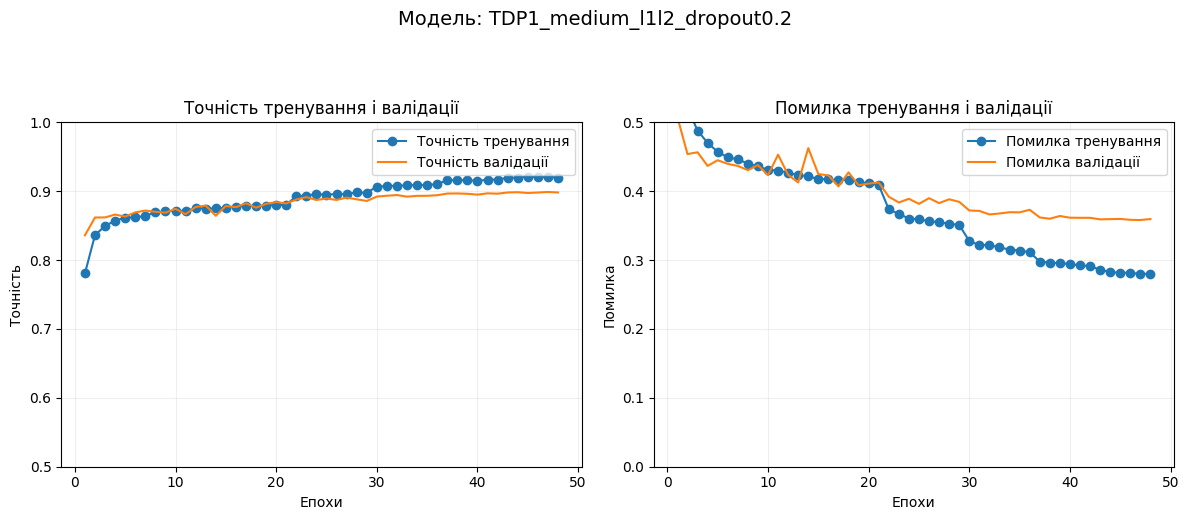

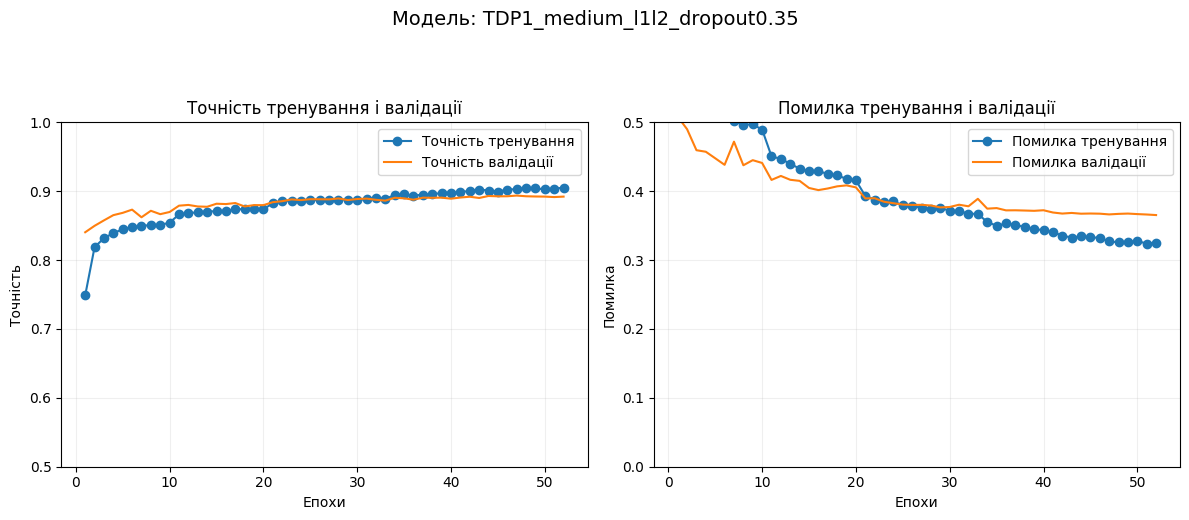

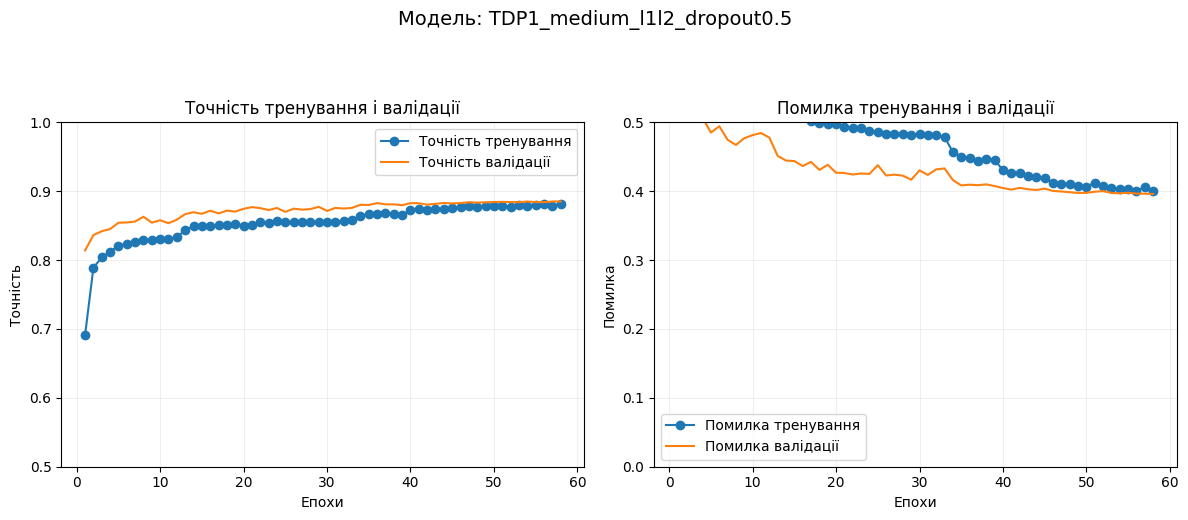

In [30]:
display_results(dropout_histories['d0.2'])
display_results(dropout_histories['d0.35'])
display_results(dropout_histories['d0.5'])

Виведемо результати фактичної помилки всіх моделей для порівняння ефективності різних значень Dropout на одному графіку:

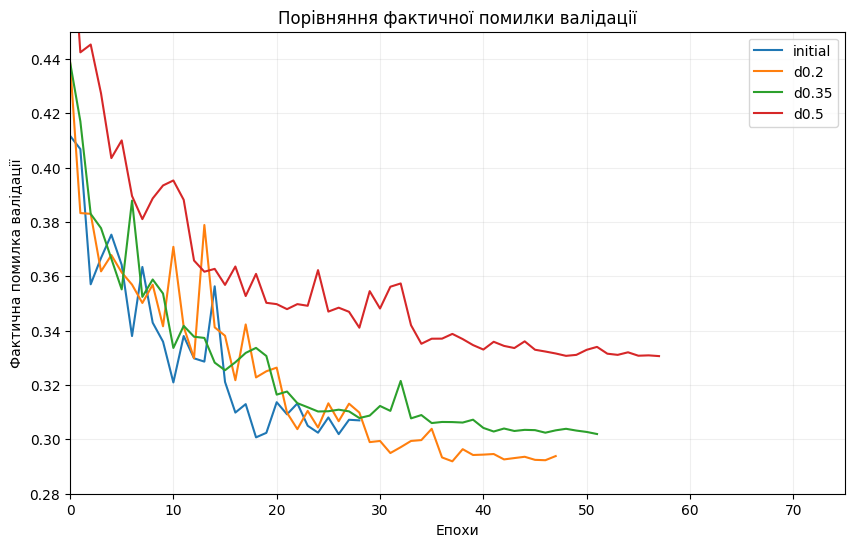

In [31]:
display_all_results(dropout_histories, 'val_xent', miny=0.28,
                    title='Порівняння фактичної помилки валідації', ylabel='Фактична помилка валідації',
                    epochs=75)

Можемо побачити, що найкращим серед обраних значень значенням Dropout є 0.2, тож застосуємо його і збережемо цю версію моделі:

Наостанок, проведемо валідацію на актуальних тестувальних даних цієї моделі для визначення результатів:

Як можемо побачити, модель має